In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img , text = 'ABCD',org=(50,300),fontFace = font ,fontScale=5,color=(255,255,255),thickness=5)
    return blank_img

In [4]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

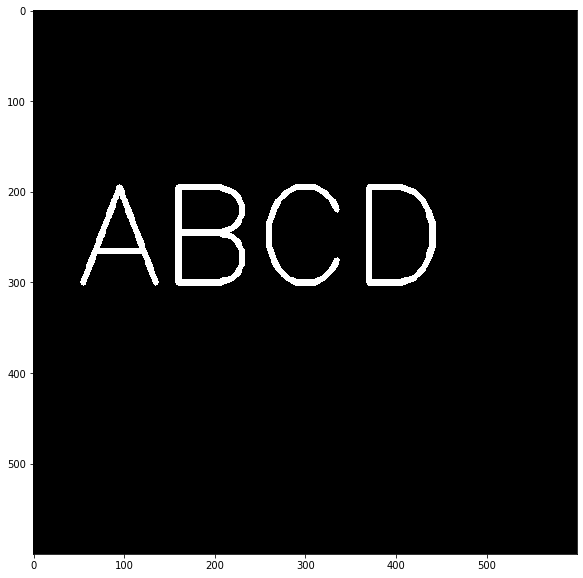

In [11]:
img =load_img()
display_img(img)

In [14]:
kernel  = np.ones((5,5),dtype=np.uint8)

In [15]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [16]:
#erod
result=cv2.erode(img,kernel,iterations=1)

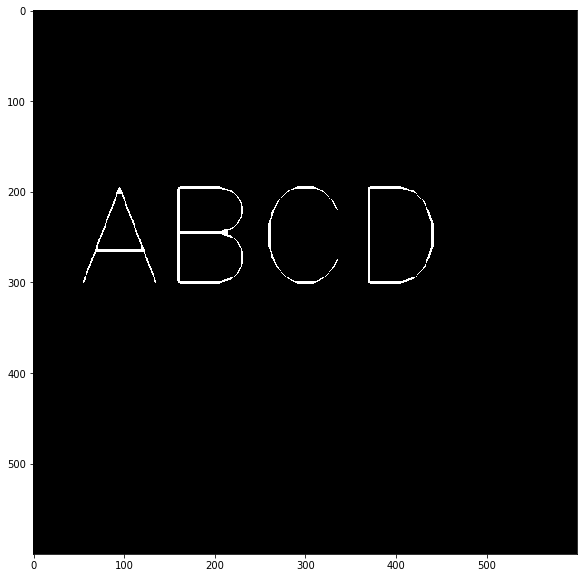

In [17]:
display_img(result)

In [18]:
#Opening is erosion followed by dilation .
#opening is actually helpful in removing background noise.
img = load_img()

In [20]:
white_noise = np.random.randint(low = 0 , high =2,size=(600,600))

In [21]:
white_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 1]])

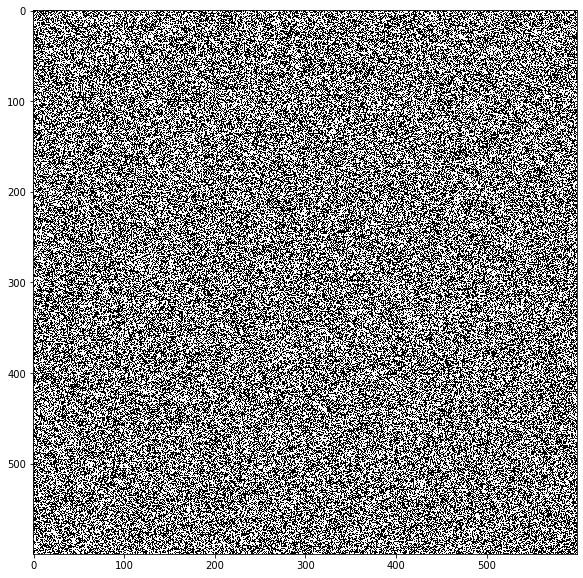

In [22]:
display_img(white_noise)

In [23]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
img.max()

255.0

In [25]:
white_noise = white_noise * 255

In [26]:
white_noise

array([[  0,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0, 255],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ...,   0,   0, 255],
       [  0,   0, 255, ...,   0, 255,   0],
       [  0, 255, 255, ..., 255,   0, 255]])

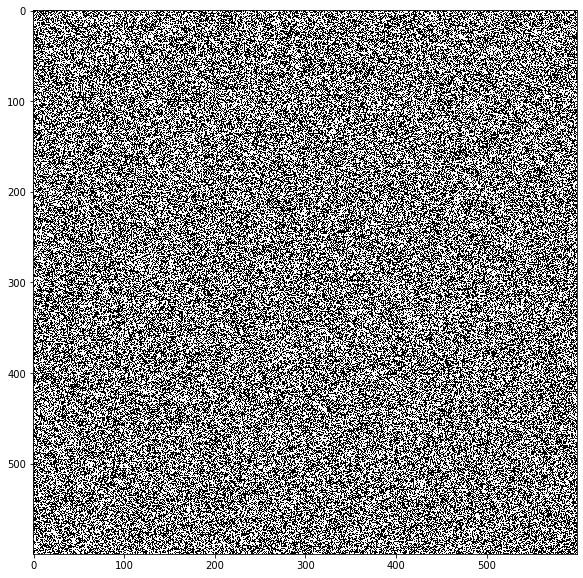

In [28]:
display_img(white_noise)

In [29]:
noise_img = white_noise +img 

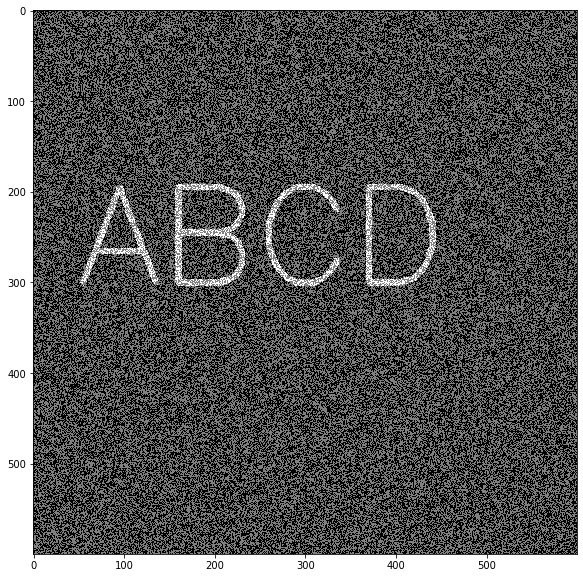

In [31]:
display_img(noise_img)

In [ ]:
#use Opening which is technique as a morphological operator.

In [32]:
#it has more distortion than the original img.
opening = cv2.morphologyEx(noise_img , cv2.MORPH_OPEN,kernel)

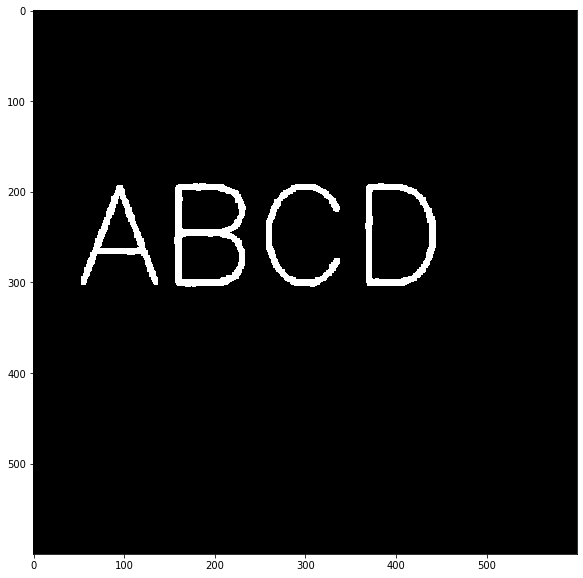

In [33]:
display_img(opening)

In [34]:
#forground noise 
img = load_img()

In [35]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [36]:
black_noise = black_noise *-255

In [37]:
black_noise

array([[-255,    0,    0, ..., -255,    0, -255],
       [-255, -255, -255, ...,    0, -255,    0],
       [   0,    0, -255, ...,    0,    0,    0],
       ...,
       [   0, -255, -255, ..., -255, -255,    0],
       [-255,    0, -255, ...,    0,    0, -255],
       [-255, -255,    0, ...,    0, -255, -255]])

In [38]:
black_noise_img = img + black_noise

In [39]:
black_noise_img

array([[-255.,    0.,    0., ..., -255.,    0., -255.],
       [-255., -255., -255., ...,    0., -255.,    0.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       ...,
       [   0., -255., -255., ..., -255., -255.,    0.],
       [-255.,    0., -255., ...,    0.,    0., -255.],
       [-255., -255.,    0., ...,    0., -255., -255.]])

In [40]:
black_noise_img [black_noise_img == -255] = 0

In [41]:
black_noise_img.min()

0.0

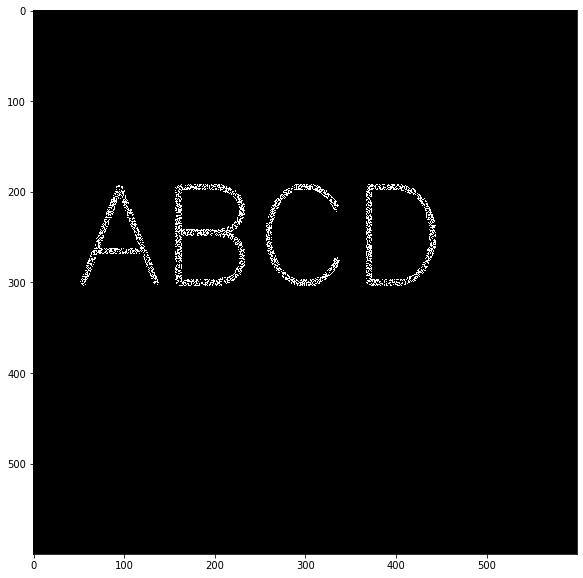

In [42]:
display_img(black_noise_img)

In [43]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

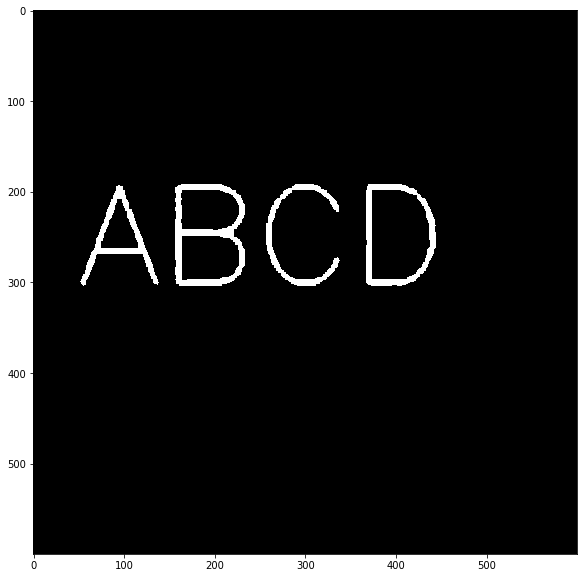

In [44]:
display_img(closing)

In [45]:
img = load_img()

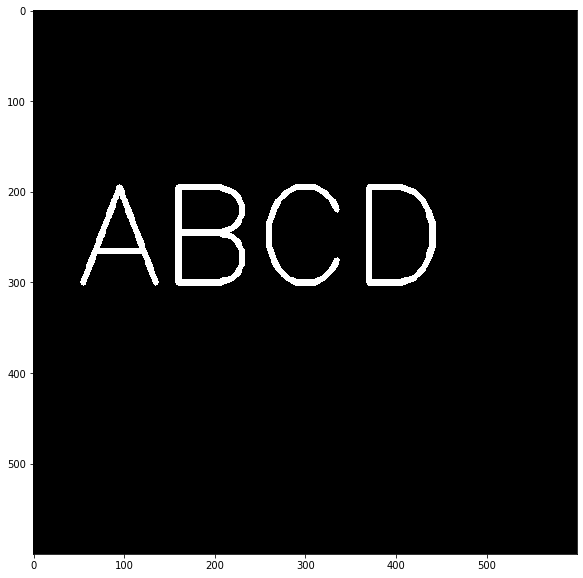

In [46]:
display_img(img)

In [49]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

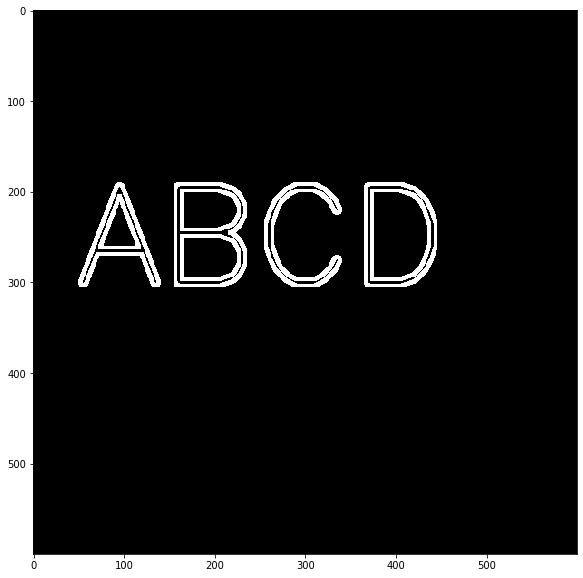

In [50]:
display_img(gradient)